## Compare different VAC versions

In [1]:
import os
import numpy as np
import fitsio
import corner as cn
from astropy.table import Table, join
from desitarget import geomask
from fastspecfit.io import read_fastspecfit

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
import seaborn as sns

sns.set(context='talk', style='whitegrid', font_scale=0.8)
colors = sns.color_palette()

%matplotlib inline

In [27]:
oo = Table(fitsio.read('/global/cfs/cdirs/desi/spectro/fastspecfit/fuji/v3.1/catalogs/fastspec-fuji-sv1-bright.fits', 'FASTSPEC'))
nn = Table(fitsio.read('/pscratch/sd/i/ioannis/fastspecfit/2.5.0/fuji/catalogs/fastspec-fuji-sv1-bright.fits', 'FASTSPEC'))
jj = join(oo, nn, keys=['TARGETID', 'SURVEY', 'PROGRAM', 'HEALPIX'])

504 510


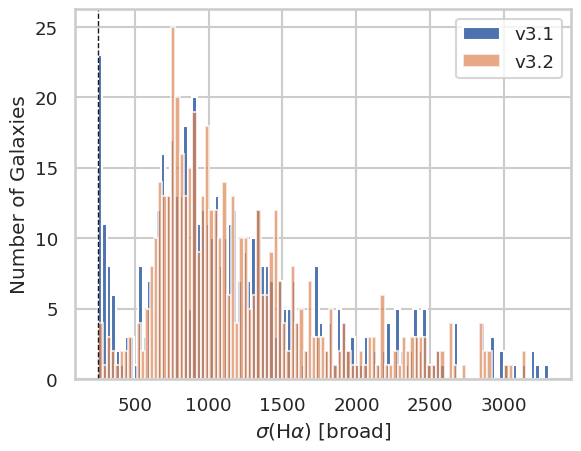

In [28]:
O = (oo['HALPHA_BROAD_AMP'] * np.sqrt(oo['HALPHA_BROAD_AMP_IVAR']) > 5)
N = (nn['HALPHA_BROAD_AMP'] * np.sqrt(nn['HALPHA_BROAD_AMP_IVAR']) > 5)
print(np.sum(O), np.sum(N))

fig, ax = plt.subplots()
ax.hist(oo[O]['HALPHA_BROAD_SIGMA'], bins=100, label='v3.1');
ax.hist(nn[N]['HALPHA_BROAD_SIGMA'], bins=100, alpha=0.7, label='v3.2');
ax.axvline(x=250., ls='--', color='k', lw=1)
ax.set_ylabel('Number of Galaxies')
ax.set_xlabel(r'$\sigma(\mathrm{H}\alpha)$ [broad]')
ax.legend();

Text(0.5, 0, '$\\sigma(\\mathrm{H}\\alpha)$ [broad, v3.1]')

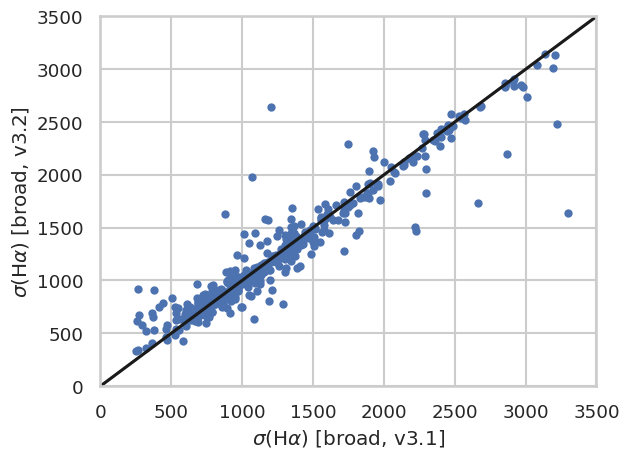

In [33]:
I = ((jj['HALPHA_BROAD_AMP_1'] * np.sqrt(jj['HALPHA_BROAD_AMP_IVAR_1']) > 5) *
     (jj['HALPHA_BROAD_AMP_2'] * np.sqrt(jj['HALPHA_BROAD_AMP_IVAR_2']) > 5))
     
fig, ax = plt.subplots()
ax.scatter(jj['HALPHA_BROAD_SIGMA_1'][I], jj['HALPHA_BROAD_SIGMA_2'][I], s=20)
ax.set_xlim(0, 3500)
ax.set_ylim(0, 3500)
ax.plot([0, 3500], [0, 3500], ls='-', color='k')
ax.set_ylabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.2]')
ax.set_xlabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.1]')

Text(0, 0.5, '$\\sigma(\\mathrm{H}\\alpha)$ [broad, v3.2]')

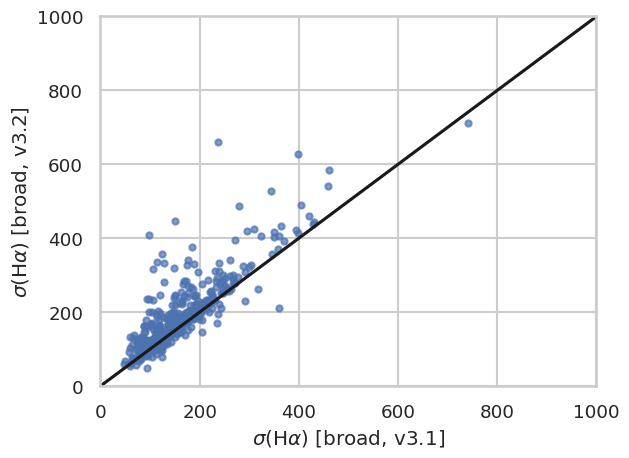

In [44]:
I = ((jj['HALPHA_BROAD_AMP_1'] * np.sqrt(jj['HALPHA_BROAD_AMP_IVAR_1']) > 5) *
     (jj['HALPHA_BROAD_AMP_2'] * np.sqrt(jj['HALPHA_BROAD_AMP_IVAR_2']) > 5))
     
fig, ax = plt.subplots()
ax.scatter(jj['OIII_5007_SIGMA_1'][I], jj['OIII_5007_SIGMA_2'][I], s=20, alpha=0.7)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.plot([0, 1000], [0, 1000], ls='-', color='k')
ax.set_xlabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.1]')
ax.set_ylabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.2]')

0.12007618


Text(0.5, 0, '$\\sigma(\\mathrm{H}\\alpha)$ [broad, v3.1]')

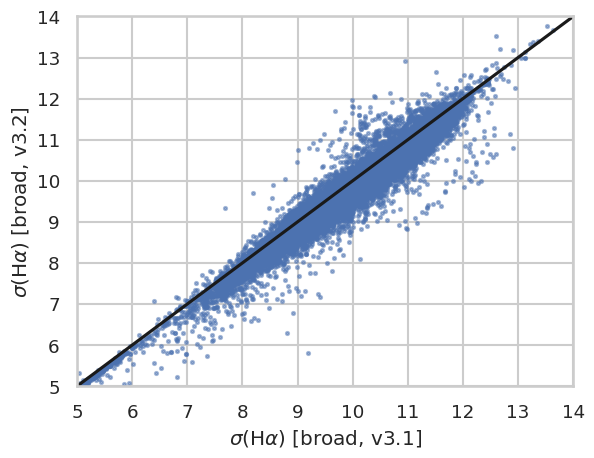

In [36]:
I = (jj['LOGMSTAR_1'] > 0) * (jj['LOGMSTAR_2'] > 0)
print(np.median(jj['LOGMSTAR_1'][I]-jj['LOGMSTAR_2'][I]))
fig, ax = plt.subplots()
ax.scatter(jj['LOGMSTAR_1'][I], jj['LOGMSTAR_2'][I], s=5, alpha=0.5)
ax.set_xlim(5, 14)
ax.set_ylim(5, 14)
ax.plot([5, 14], [5, 14], ls='-', color='k')
ax.set_ylabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.2]')
ax.set_xlabel(r'$\sigma(\mathrm{H}\alpha)$ [broad, v3.1]')

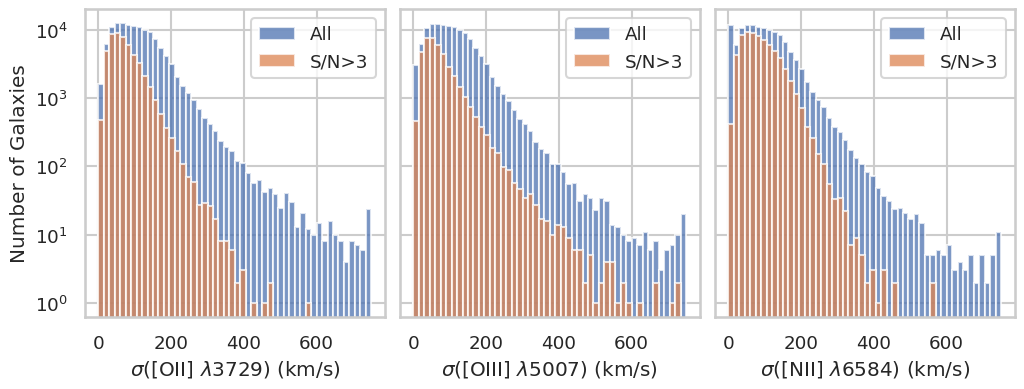

In [72]:
lines = ['OII_3729_SIGMA', 'OIII_5007_SIGMA', 'NII_6584_SIGMA']
labels = [r'$\sigma(\mathrm{[OII]}\ \lambda3729)$ (km/s)',
          r'$\sigma(\mathrm{[OIII]}\ \lambda5007)$ (km/s)',
          r'$\sigma(\mathrm{[NII]}\ \lambda6584)$ (km/s)']

II = [nn['OII_3729_AMP'] * np.sqrt(nn['OII_3729_AMP_IVAR']) > 3,
      nn['OIII_5007_AMP'] * np.sqrt(nn['OIII_5007_AMP_IVAR']) > 3,
      nn['NII_6584_AMP'] * np.sqrt(nn['NII_6584_AMP_IVAR']) > 3]

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
#axes[0].hist(nn[lines[0]].data, bins=30);
#axes[1].hist(nn[lines[1]], bins=100);

for ax, line, label, I in zip(axes, lines, labels, II):
    ax.hist(nn[line], bins=50, label='All', range=(0, 750), alpha=0.75);
    ax.hist(nn[line][I], bins=50, label='S/N>3', range=(0, 750), alpha=0.75);
    ax.set_yscale('log')
    ax.set_xlabel(label)
    ax.legend()
axes[0].set_ylabel('Number of Galaxies')
fig.subplots_adjust(wspace=0.05)